## Fish Species Detection and Recognition using Deep Learning
---

![](fish.gif)

## Introduction to the problem

Estimating the relative abundance of fish species in their habitats on a regular basis and keeping an eye on population fluctuations are crucial tasks for marine scientists and conservationists. Not only that even in day to day life of fisherman to recongnize a species that is unknown to them might be crucial too. 

There isn't, however, a perfect method for automatically detecting fish and classifying their species. This is mostly due to the difficulties in producing clear underwater images and videos, which include environmental fluctuations in lighting, fish camouflage, dynamic backdrops, murky water, low resolution, shape deformations of moving fish, and tiny variances between some fish species.

## The Dataset

This dataset contains 20 different species types. These include 'Anthias anthias','Atherinomorus lacunosus', 'Belone belone', 'Boops boops', 'Chlorophthalmus agassizi', 'Coris julis', 'Dasyatis centroura', 'Epinephelus caninus', 'Gobius niger', 'Mugil cephalus', 'Phycis phycis', 'Polyprion americanus', 'Pseudocaranx dentex', 'Rhinobatos cemiculus', 'Scomber japonicus', 'Solea solea', 'Squalus acanthias', 'Tetrapturus belone', 'Trachinus draco', 'Trigloporus lastoviza'. For each class there are 2000 images.

## Transfer learning

Transfer learning is a machine learning technique where a pre-trained model is used as a starting point for a new, related task. Instead of training a model from scratch on the new task-specific dataset, transfer learning allows us to leverage the knowledge learned by the pre-trained model on a different but related task.

The key idea behind transfer learning is that features learned by a model on one task can be valuable for a new, similar task. The pre-trained model acts as a feature extractor, where the initial layers of the model, often called the "base model," are frozen, and their weights are not updated during training. These layers are responsible for learning generic features from a large dataset, such as low-level visual features like edges, textures, and shapes.

On top of the frozen base model, additional layers called the "top layers" or "classification layers" are added. These layers are randomly initialized, and their weights are updated during training. The top layers are responsible for learning task-specific features and making predictions for the new task.


## Importing Necessary libraries and modules

In [1]:
#Data Handling & Linear Algebra
import numpy as np
import pandas as pd
import os

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Manipulation data and Model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#Implementaion of Transfer learning
from tensorflow.keras.applications import MobileNetV2

#Image generation and transfer learning
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Result and performance analysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Analysis of the dataset

In [2]:
#Creating a master directory
DIR = 'D:\Species'   

# Set the paths to your training and testing datasets
train_dir = 'D:\Species\Training_Set'
test_dir = 'D:\Species\Test_Set'

# Extract class names from folder names
classes = sorted(os.listdir(train_dir))

classes

['Anthias anthias',
 'Atherinomorus lacunosus',
 'Belone belone',
 'Boops boops',
 'Chlorophthalmus agassizi',
 'Coris julis',
 'Dasyatis centroura',
 'Epinephelus caninus',
 'Gobius niger',
 'Mugil cephalus',
 'Phycis phycis',
 'Polyprion americanus',
 'Pseudocaranx dentex',
 'Rhinobatos cemiculus',
 'Scomber japonicus',
 'Solea solea',
 'Squalus acanthias',
 'Tetrapturus belone',
 'Trachinus draco',
 'Trigloporus lastoviza']

In [3]:

# Specify the directory containing the files and labels
directory = DIR

# Initialize lists to store file paths and labels
file_paths = []
labels = []

# Iterate through the subdirectories and files in the directory
for root, dirs, files in os.walk(directory):
    for file_name in files:
        if file_name.endswith(".jpg"):
            file_path = os.path.join(root, file_name)
            label = root.split(os.path.sep)[-1]  
            
            file_paths.append(file_path)
            labels.append(label)


# Create a dataframe with file paths and labels
df = pd.DataFrame(columns=['path','label'])
df['path']=file_paths
df['label']=labels


In [4]:
df.head()

,path,label
0,D:\Species\Test_Set\Anthias anthias\anthias_an...,Anthias anthias
1,D:\Species\Test_Set\Anthias anthias\anthias_an...,Anthias anthias
2,D:\Species\Test_Set\Anthias anthias\anthias_an...,Anthias anthias
3,D:\Species\Test_Set\Anthias anthias\anthias_an...,Anthias anthias
4,D:\Species\Test_Set\Anthias anthias\anthias_an...,Anthias anthias


In [5]:
df.path[0]

'D:\\Species\\Test_Set\\Anthias anthias\\anthias_anthias-1700.jpg'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    40000 non-null  object
 1   label   40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [7]:
#Checking the value counts of each of the datasets
#df['label']=df['label'].astype('category')
df['label'].value_counts()

Anthias anthias             2000
Atherinomorus lacunosus     2000
Trachinus draco             2000
Tetrapturus belone          2000
Squalus acanthias           2000
Solea solea                 2000
Scomber japonicus           2000
Rhinobatos cemiculus        2000
Pseudocaranx dentex         2000
Polyprion americanus        2000
Phycis phycis               2000
Mugil cephalus              2000
Gobius niger                2000
Epinephelus caninus         2000
Dasyatis centroura          2000
Coris julis                 2000
Chlorophthalmus agassizi    2000
Boops boops                 2000
Belone belone               2000
Trigloporus lastoviza       2000
Name: label, dtype: int64

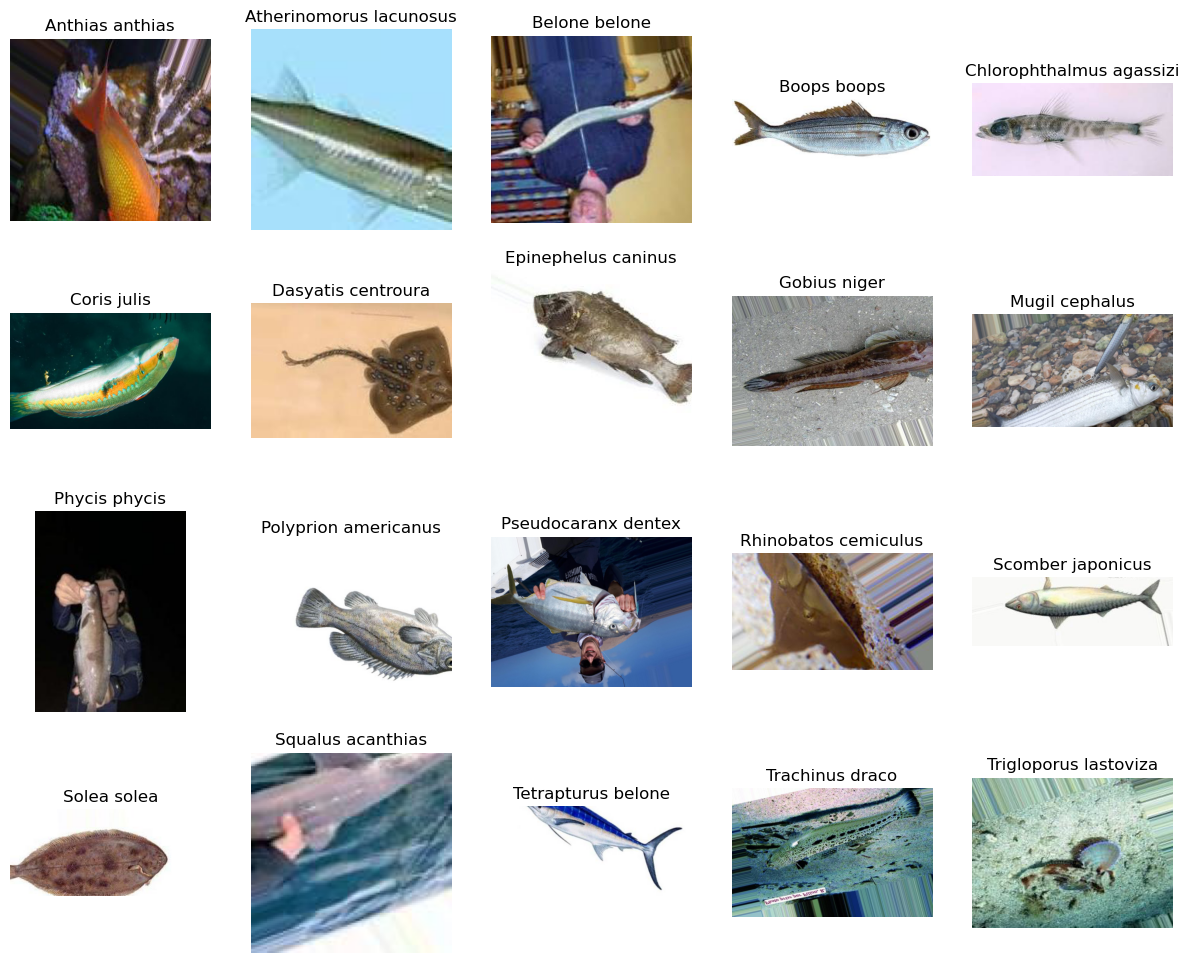

In [8]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(4, 5, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

## Test-Train Split

In [9]:
#Creating the test train split with shuffle
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [10]:
#Checking the shaoe of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(32000, 2)
(8000, 2)


## Preprocessing the dataset

In [11]:
#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='path', 
                                                 y_col='label', 
                                                 target_size=(224, 224), 
                                                 color_mode='rgb', 
                                                 class_mode='categorical', 
                                                 batch_size=32, 
                                                 shuffle=True, 
                                                 seed=42, 
                                                 subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='path', 
                                                 y_col='label', 
                                                 target_size=(224, 224), 
                                                 color_mode='rgb', 
                                                 class_mode='categorical', 
                                                 batch_size=32, 
                                                 shuffle=True, 
                                                 seed=42, 
                                                 subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, 
                                                 x_col='path', 
                                                 y_col='label', 
                                                 target_size=(224, 224), 
                                                 color_mode='rgb', 
                                                 class_mode='categorical', 
                                                 batch_size=32, 
                                                 shuffle=False )


Found 25600 validated image filenames belonging to 20 classes.
Found 6400 validated image filenames belonging to 20 classes.
Found 8000 validated image filenames belonging to 20 classes.


In [13]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)


{'Anthias anthias': 0,
 'Atherinomorus lacunosus': 1,
 'Belone belone': 2,
 'Boops boops': 3,
 'Chlorophthalmus agassizi': 4,
 'Coris julis': 5,
 'Dasyatis centroura': 6,
 'Epinephelus caninus': 7,
 'Gobius niger': 8,
 'Mugil cephalus': 9,
 'Phycis phycis': 10,
 'Polyprion americanus': 11,
 'Pseudocaranx dentex': 12,
 'Rhinobatos cemiculus': 13,
 'Scomber japonicus': 14,
 'Solea solea': 15,
 'Squalus acanthias': 16,
 'Tetrapturus belone': 17,
 'Trachinus draco': 18,
 'Trigloporus lastoviza': 19}

{'Anthias anthias': 0,
 'Atherinomorus lacunosus': 1,
 'Belone belone': 2,
 'Boops boops': 3,
 'Chlorophthalmus agassizi': 4,
 'Coris julis': 5,
 'Dasyatis centroura': 6,
 'Epinephelus caninus': 7,
 'Gobius niger': 8,
 'Mugil cephalus': 9,
 'Phycis phycis': 10,
 'Polyprion americanus': 11,
 'Pseudocaranx dentex': 12,
 'Rhinobatos cemiculus': 13,
 'Scomber japonicus': 14,
 'Solea solea': 15,
 'Squalus acanthias': 16,
 'Tetrapturus belone': 17,
 'Trachinus draco': 18,
 'Trigloporus lastoviza': 19}

{'Anthias anthias': 0,
 'Atherinomorus lacunosus': 1,
 'Belone belone': 2,
 'Boops boops': 3,
 'Chlorophthalmus agassizi': 4,
 'Coris julis': 5,
 'Dasyatis centroura': 6,
 'Epinephelus caninus': 7,
 'Gobius niger': 8,
 'Mugil cephalus': 9,
 'Phycis phycis': 10,
 'Polyprion americanus': 11,
 'Pseudocaranx dentex': 12,
 'Rhinobatos cemiculus': 13,
 'Scomber japonicus': 14,
 'Solea solea': 15,
 'Squalus acanthias': 16,
 'Tetrapturus belone': 17,
 'Trachinus draco': 18,
 'Trigloporus lastoviza': 19}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


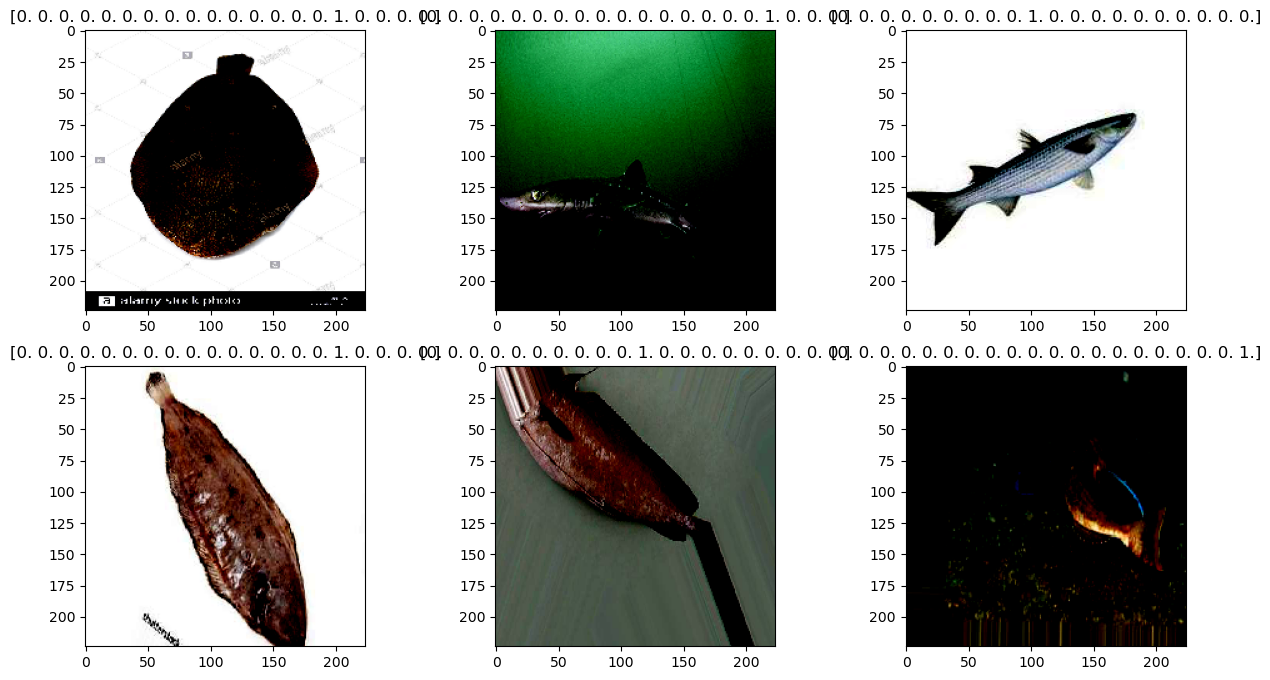

In [14]:
#Plotting images after pre-processing

fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = test_images.next()
    
    ax[j].imshow(img[0],)
    ax[j].set_title(str(label[0]))
    j=j+1
    

## Model training and Evaluation

### MobileNet v2

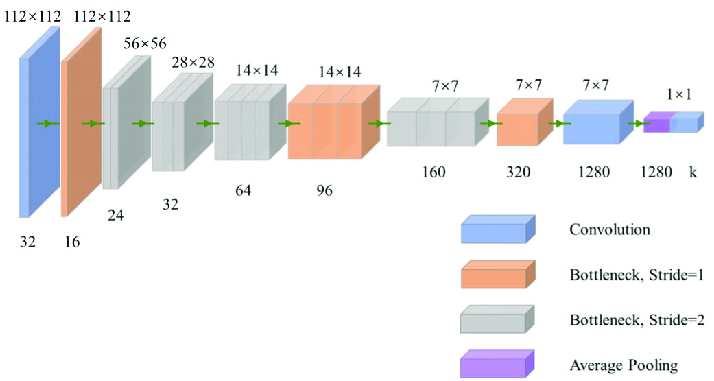


MobileNetV2 is a deep learning model architecture designed for efficient on-device image classification. It is an extension of the original MobileNet architecture and was introduced by Google researchers in their paper titled "MobileNetV2: Inverted Residuals and Linear Bottlenecks."

The main objectives of MobileNetV2 are to improve model performance while maintaining the efficiency and lightweight characteristics of the original MobileNet. It achieves this by introducing several key components:

1. *Inverted Residuals*: MobileNetV2 utilizes inverted residual blocks. Unlike traditional residual blocks in which the number of channels increases in the residual connection, inverted residuals reduce the number of channels in the middle of the block, leading to more efficient computation.

2. *Linear Bottlenecks*: The inverted residual blocks include a pointwise (1x1) convolution called a "bottleneck" layer with fewer channels than the input and output layers. This reduces the computational cost while still allowing the network to learn complex representations.

3. *Depthwise Separable Convolutions*: MobileNetV2 uses depthwise separable convolutions, a technique that factorizes a standard convolution into a depthwise convolution (applying a separate filter to each input channel) and a pointwise convolution (a 1x1 convolution). This further reduces the computational complexity of the model.

4. *Inverted Residual Connection*: The inverted residuals use a skip connection that fuses the low-resolution, high-dimensional output of the bottleneck layer with the high-resolution, low-dimensional input to the block. This helps to preserve fine-grained details and improve the flow of gradients during training.

These optimizations make MobileNetV2 significantly faster and more memory-efficient compared to other deep learning models, while still achieving competitive accuracy on image classification tasks. It is especially well-suited for resource-constrained devices like mobile phones and embedded systems.


In [15]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [16]:
#Creating our model inputs
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_images,
                    validation_data=test_images,
                    epochs=10,
                    callbacks=[early_stopping])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [17]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.17487
Test Accuracy: 95.32%


In [18]:
model.save('fish_classification_test.h5')

In [19]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

250/250 [==============================] - 56s 223ms/step


In [20]:

pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])




In [27]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(20)

,path,label,pred
0,D:\Species\Training_Set\Solea solea\solea_sole...,Solea solea,Solea solea
1,D:\Species\Training_Set\Dasyatis centroura\das...,Dasyatis centroura,Dasyatis centroura
2,D:\Species\Training_Set\Rhinobatos cemiculus\r...,Rhinobatos cemiculus,Squalus acanthias
3,D:\Species\Training_Set\Anthias anthias\anthia...,Anthias anthias,Anthias anthias
4,D:\Species\Training_Set\Pseudocaranx dentex\ps...,Pseudocaranx dentex,Pseudocaranx dentex
5,D:\Species\Training_Set\Tetrapturus belone\tet...,Tetrapturus belone,Tetrapturus belone
6,D:\Species\Training_Set\Boops boops\boops_boop...,Boops boops,Boops boops
7,D:\Species\Training_Set\Rhinobatos cemiculus\r...,Rhinobatos cemiculus,Rhinobatos cemiculus
8,D:\Species\Training_Set\Epinephelus caninus\ep...,Epinephelus caninus,Epinephelus caninus
9,D:\Species\Training_Set\Scomber japonicus\scom...,Scomber japonicus,Atherinomorus lacunosus


In [28]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]


,path,label,pred
2,D:\Species\Training_Set\Rhinobatos cemiculus\r...,Rhinobatos cemiculus,Squalus acanthias
9,D:\Species\Training_Set\Scomber japonicus\scom...,Scomber japonicus,Atherinomorus lacunosus
18,D:\Species\Training_Set\Polyprion americanus\p...,Polyprion americanus,Phycis phycis
29,D:\Species\Training_Set\Rhinobatos cemiculus\r...,Rhinobatos cemiculus,Phycis phycis
73,D:\Species\Training_Set\Trachinus draco\trachi...,Trachinus draco,Phycis phycis
...,...,...,...
7846,D:\Species\Training_Set\Squalus acanthias\squa...,Squalus acanthias,Trigloporus lastoviza
7902,D:\Species\Training_Set\Squalus acanthias\squa...,Squalus acanthias,Belone belone
7934,D:\Species\Training_Set\Mugil cephalus\mugil_c...,Mugil cephalus,Atherinomorus lacunosus
7950,D:\Species\Training_Set\Polyprion americanus\p...,Polyprion americanus,Epinephelus caninus


*There are 374 incorrect predictions out of 8000 Test images.*

In [29]:
pred_df.path[2]


'D:\\Species\\Training_Set\\Rhinobatos cemiculus\\rhinobatos_cemiculus-1362.jpg'

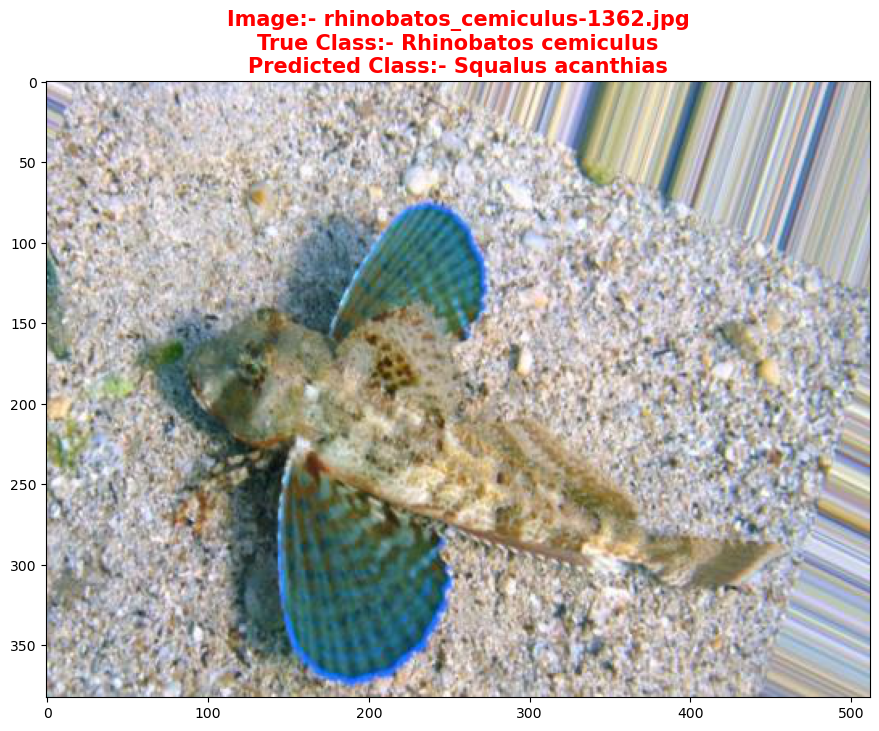

In [30]:
#Find image which was incorrectly predicted
plt.figure(figsize=(15,8))
plt.imshow(plt.imread(pred_df.path[2]))

title1 = pred_df.path[2].split('\\')[-2]
title2 = pred_df.path[2].split('\\')[-1]
title3 = pred_df.pred[2]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

## Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. It presents a detailed comparison of the predicted labels versus the actual labels for a given dataset. The matrix allows us to understand how well the model is making correct predictions and where it is making err

Accuracy Score: 0.95325


<Axes: >

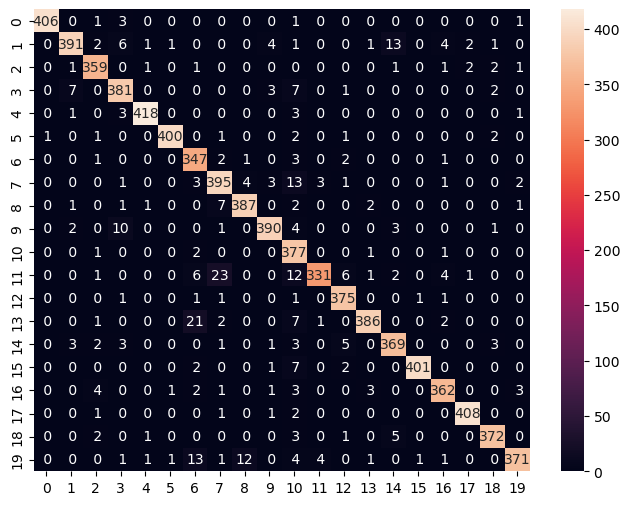

In [31]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

## Evaluation Metrics

To evaluate the performance of the fish classification model, the following metrics can be used:

1. *Accuracy*: The percentage of correct predictions over the total number of predictions made by the model.

2. *Precision*: The proportion of true positive predictions (correctly classified instances of a class) out of all positive predictions for that class.

3. *Recall*: The proportion of true positive predictions out of all actual instances of a class.

4. *F1 Score*: The harmonic mean of precision and recall, which provides a balanced evaluation of the model's performance.

In [32]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                          precision    recall  f1-score   support

         Anthias anthias       1.00      0.99      0.99       412
 Atherinomorus lacunosus       0.96      0.92      0.94       427
           Belone belone       0.95      0.97      0.96       369
             Boops boops       0.93      0.95      0.94       401
Chlorophthalmus agassizi       0.99      0.98      0.98       426
             Coris julis       0.99      0.98      0.99       408
      Dasyatis centroura       0.87      0.97      0.92       357
     Epinephelus caninus       0.91      0.93      0.92       426
            Gobius niger       0.96      0.96      0.96       402
          Mugil cephalus       0.97      0.95      0.96       411
           Phycis phycis       0.83      0.99      0.90       382
    Polyprion americanus       0.98      0.86      0.91       387
     Pseudocaranx dentex       0.95      0.98      0.97       381
    Rhinobatos cemiculus       0.98      0.92      0.95       420
       Sc

We have achived 95% accuracy by using Transfer Learning